In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

In [3]:
# NAIVE BAYES

nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train, y_train)

# Prédiction
y_pred_nb = nb_model.predict(X_test)

# Rapport
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Score
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = report_nb["macro avg"]["f1-score"]

# Enregistrement du modèle et des prédictions
joblib.dump(nb_model, "Models/naive_bayes.pkl")
np.save("Predictions/y_pred_nb.npy", y_pred_nb)

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

          10       0.60      0.16      0.25       623
          40       0.79      0.49      0.60       496
          50       0.69      0.83      0.75       329
          60       0.67      0.81      0.74       163
        1140       0.73      0.81      0.77       533
        1160       0.95      0.93      0.94       790
        1180       0.56      0.63      0.60       153
        1280       0.70      0.48      0.57       969
        1281       0.47      0.48      0.47       408
        1300       0.82      0.93      0.87      1001
        1301       0.75      0.92      0.83       139
        1302       0.71      0.77      0.74       475
        1320       0.87      0.69      0.77       645
        1560       0.76      0.78      0.77      1000
        1920       0.83      0.90      0.87       816
        1940       0.75      0.94      0.83       160
        2060       0.66      0.77      0.71 

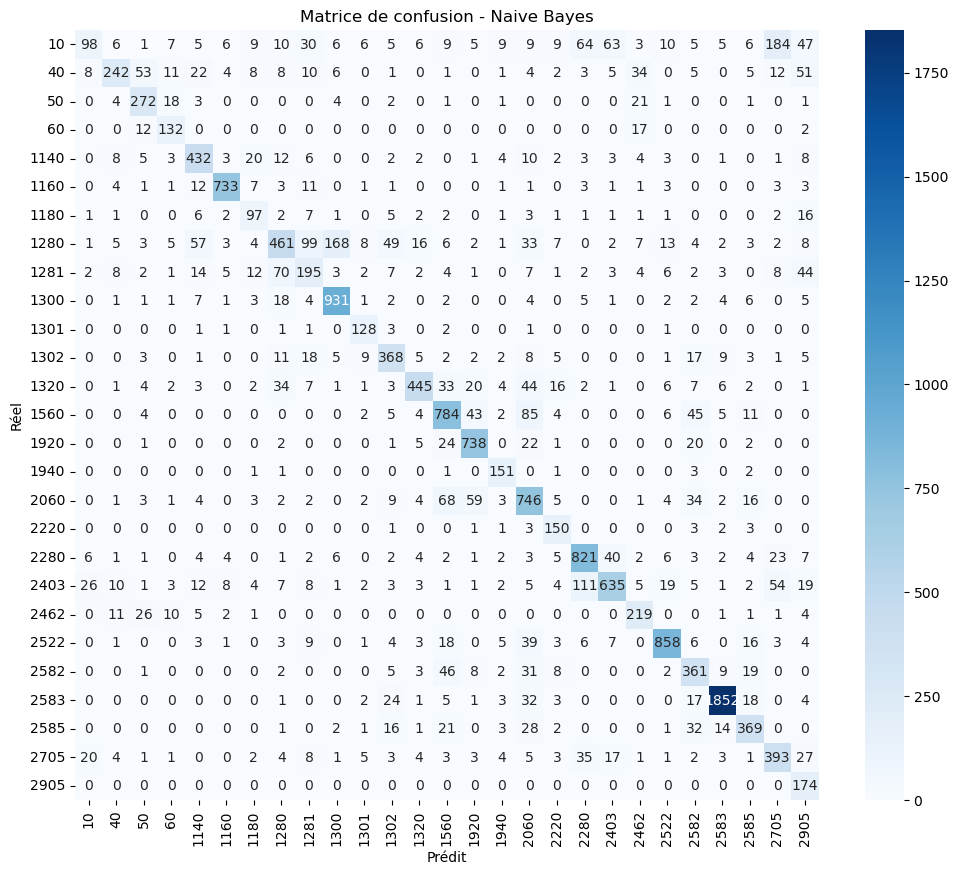

In [4]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Naive Bayes")
plt.show()

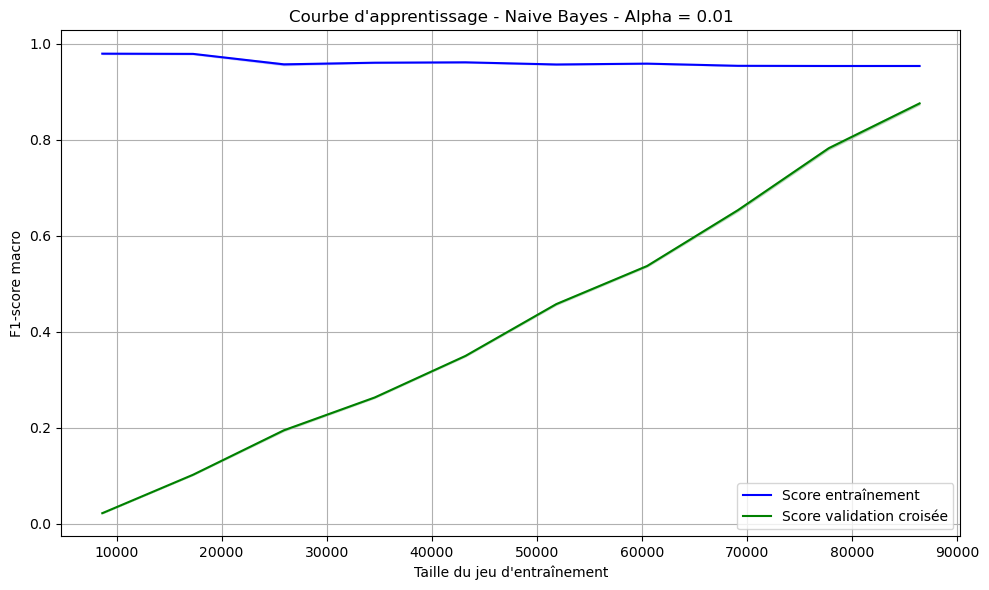

In [6]:
# Courbe d'apprentissage du Naive Bayes avec alpha = 0.01, 0.1, 1.0, 2.0

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    MultinomialNB(alpha=0.01),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Naive Bayes - Alpha = 0.01")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'entrainement est très proche de 1. Le modèle surapprend / overfitting
- Le score de validation est faible (même avec beaucoup de données, il ne rejoint pas la courbe d'apprentissage) : la généralisation avec alpha = 0.01 est mauvaise

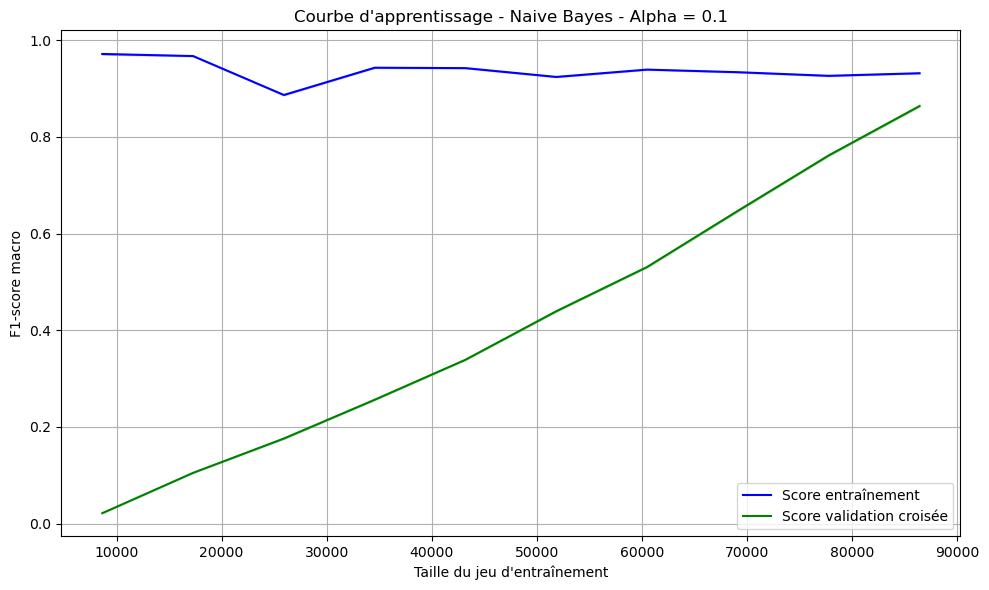

In [7]:
train_sizes, train_scores, val_scores = learning_curve(
    MultinomialNB(alpha=0.1),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Naive Bayes - Alpha = 0.1")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'entrainement est moins proche de 1 que le précédent. Il y a moins d'overfitting, ce qui semble plus réaliste
- Le score de validation ne rejoint toujours pas la courbe d'entrainement. La généralisation est toujours mauvaise et il y a encore de l'overfitting

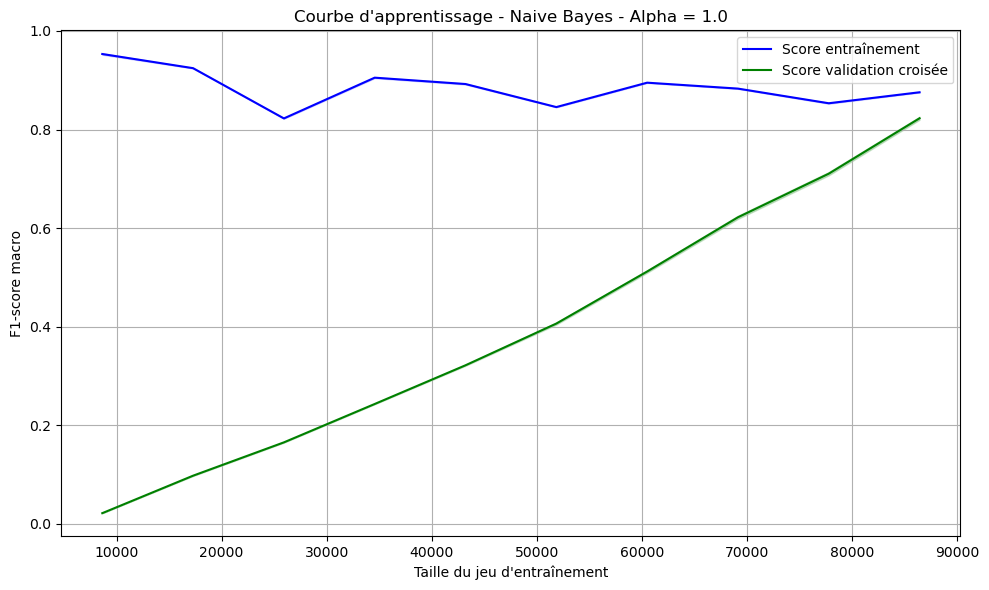

In [10]:
train_sizes, train_scores, val_scores = learning_curve(
    MultinomialNB(alpha=1.0),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Naive Bayes - Alpha = 1.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score entraînement tourne autour des 0.9, et est donc plus faible que précédemment
- Le score de validation fini autour des 0.82 et reste plus faible que le modèle avec alpha = 0.1

Conclusion : Le modèle avec alpha = 1 semble moins performant que celui avec alpha = 0.1

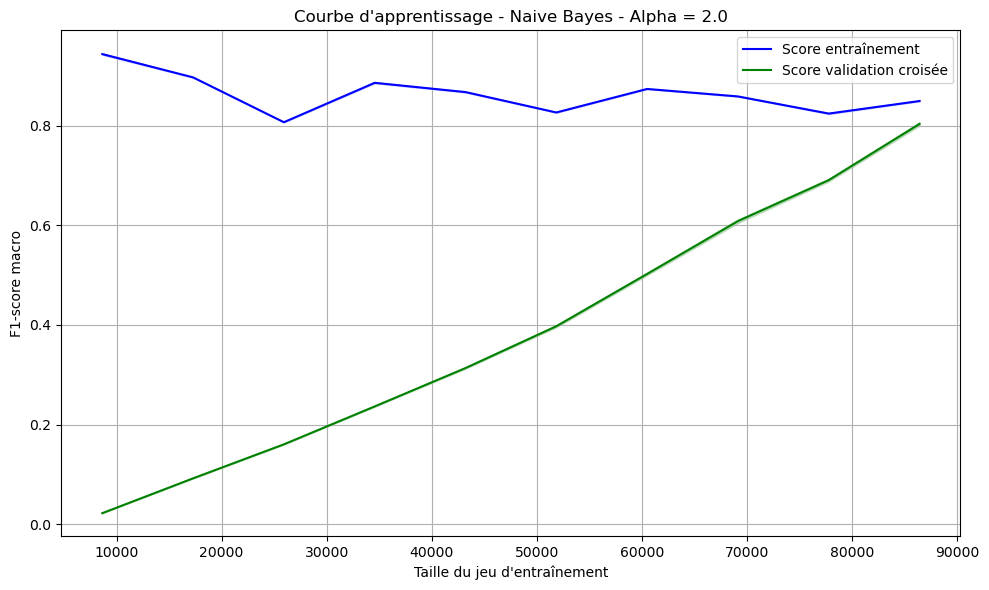

In [11]:
train_sizes, train_scores, val_scores = learning_curve(
    MultinomialNB(alpha=2.0),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Naive Bayes - Alpha = 2.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'entrainement continue de chuter : environ 0.85
- Le score de validation continue également de chuter : environ 0.81

Conclusion : le modèle perd en puissance. Il y a certainement un sous-apprentissage par rapport au modèle alpha = 0.1. Nous allons donc sauvegarder le modèle avec alpha = 0.1 qui semble être le meilleur compromis.

In [12]:
# NAIVE BAYES

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

# Prédiction
y_pred_nb = nb_model.predict(X_test)

# Rapport
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Score
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = report_nb["macro avg"]["f1-score"]

# Enregistrement du modèle et des prédictions
joblib.dump(nb_model, "Models/naive_bayes.pkl")
np.save("Predictions/y_pred_nb.npy", y_pred_nb)

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

          10       0.53      0.25      0.34       623
          40       0.73      0.53      0.62       496
          50       0.72      0.82      0.77       329
          60       0.79      0.74      0.77       163
        1140       0.69      0.80      0.74       533
        1160       0.95      0.94      0.95       790
        1180       0.61      0.60      0.61       153
        1280       0.67      0.51      0.58       969
        1281       0.48      0.51      0.50       408
        1300       0.83      0.94      0.88      1001
        1301       0.91      0.91      0.91       139
        1302       0.74      0.79      0.76       475
        1320       0.84      0.77      0.80       645
        1560       0.76      0.80      0.78      1000
        1920       0.87      0.89      0.88       816
        1940       0.78      0.95      0.85       160
        2060       0.72      0.76      0.74 

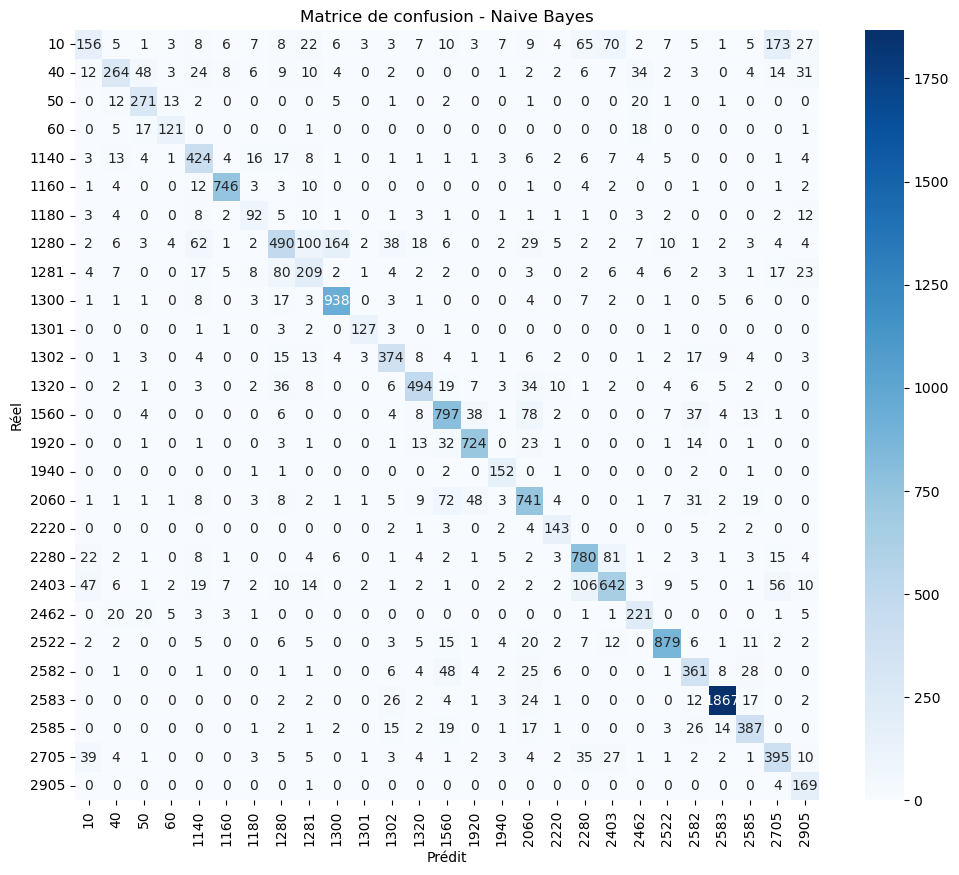

In [13]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Naive Bayes")
plt.show()